# **TELECOM CUSTOMER CHURN**

**Author:** Sonia Firdous
soniafirdous1985@gmail.com

**Dataset:**
This dataset, from IBM's sample data, is for Telco Customer Churn Prediction, containing customer details (demographics, services, account info) to identify those likely to leave (churn).

**Data Structure:** Each row is a customer, with columns detailing their attributes.
The raw data contains 7043 rows (customers) and 21 columns (features).

The “**Churn**” column is our target

**Goal:** Predict customer churn (who leaves) to create retention programs.

IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

LOAD DATASET

In [4]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (3).csv")

QUICK INFO

In [5]:
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


dropping customerID column

In [10]:
df = df.drop(columns=["customerID"])

value counts for all columns

In [11]:
numerical_feature = df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).columns.tolist()
categorical_feature = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
for col in df.columns:

    print(df[col].value_counts())
    print()

gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                 

From value counts obsrved that 11 observations are empty in total charges ,no values given so we replace them with zero

we replace with zero because :

customer has tenure = 0

customer just joined

they have not been billed yet

In [13]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
len(df[df["TotalCharges"]==" "])

11

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [16]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


missing values

In [18]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


plot a heatmap to show missing value

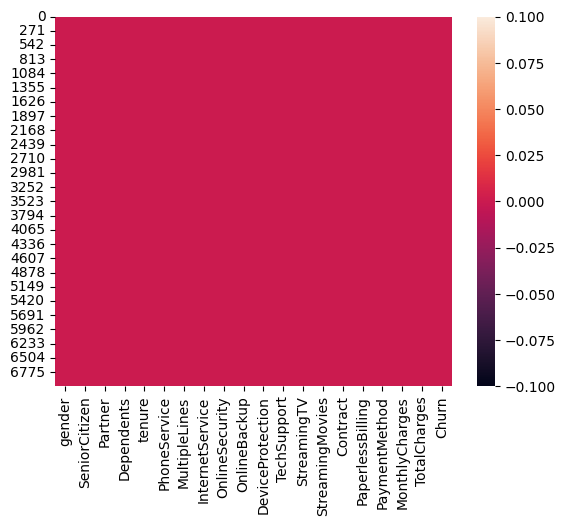

In [19]:
sns.heatmap(df.isnull())
plt.show()

looking at the target variable

count plot for target feature

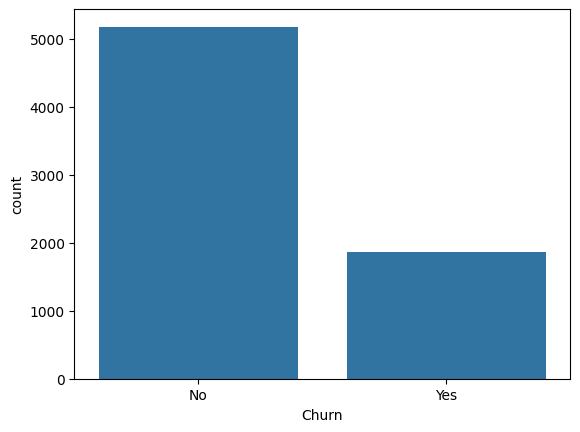

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [20]:
sns.countplot(data=df, x="Churn")
plt.show()
print(df["Churn"].value_counts())

the target class is imbalance we need to balance dataset

plot all numerical feature

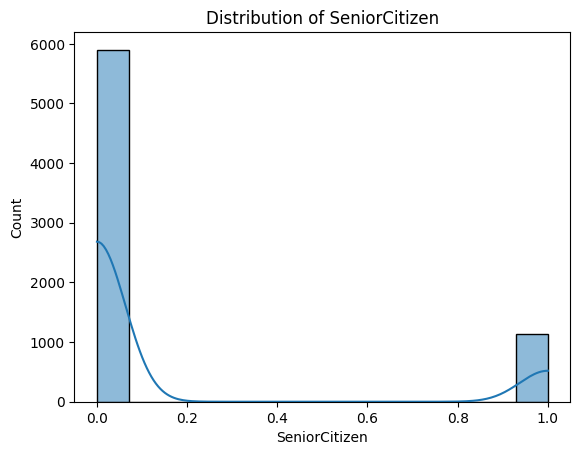

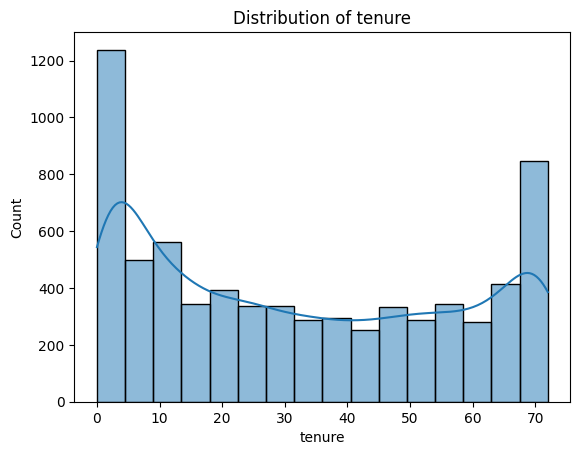

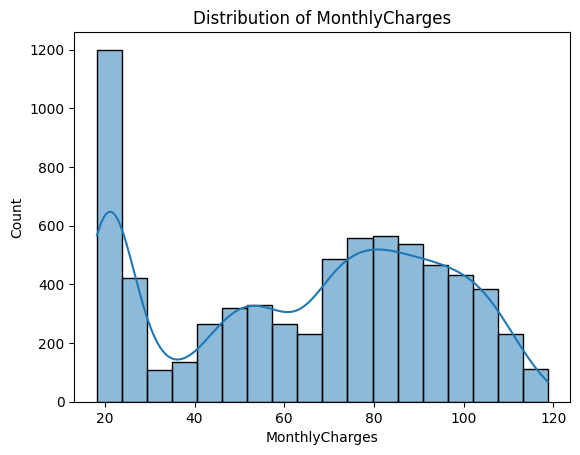

In [21]:
for col in numerical_feature:
  sns.histplot(df[col],kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

Box plot for numerical features

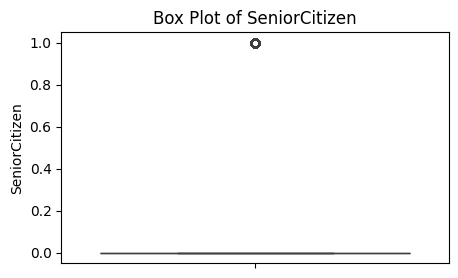

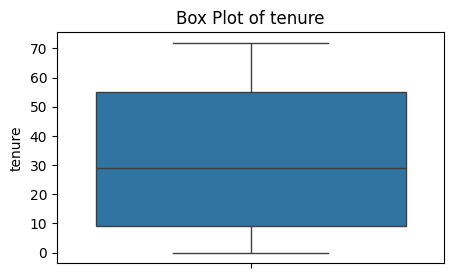

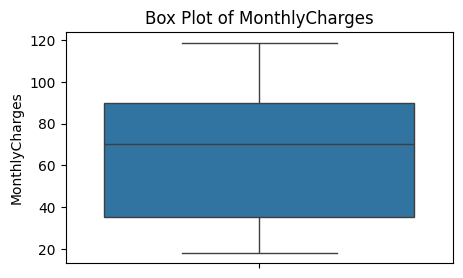

In [22]:

for col in numerical_feature:
  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[col])
  plt.title(f"Box Plot of {col}")
  plt.ylabel(col)
  plt.show()


no notable outlier to remove

correlation matrix - heatmap

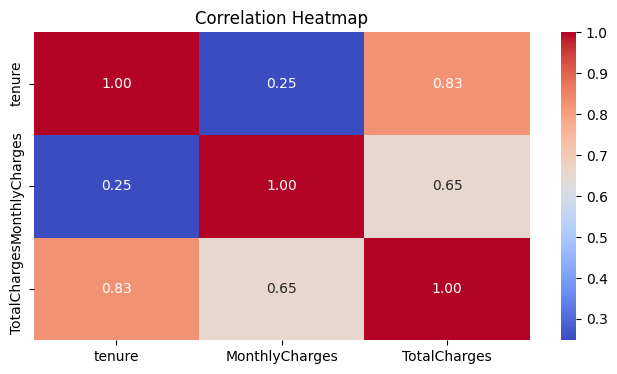

In [23]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

correlation matrix

In [24]:
# Convert 'Churn' column to numerical (0 for 'No', 1 for 'Yes') for correlation calculation
churn_numeric = df['Churn'].map({'Yes': 1, 'No': 0})

# Create a temporary DataFrame with numerical features and the converted 'Churn'
temp_df_for_corr = df[numerical_feature].copy()
temp_df_for_corr['Churn'] = churn_numeric

# Calculate the correlation matrix for these columns and select the 'Churn' column
print(temp_df_for_corr.corr()['Churn'])

SeniorCitizen     0.150889
tenure           -0.352229
MonthlyCharges    0.193356
Churn             1.000000
Name: Churn, dtype: float64


columns

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

categorical column vs target


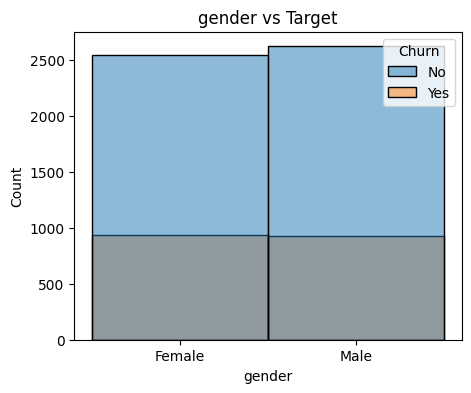

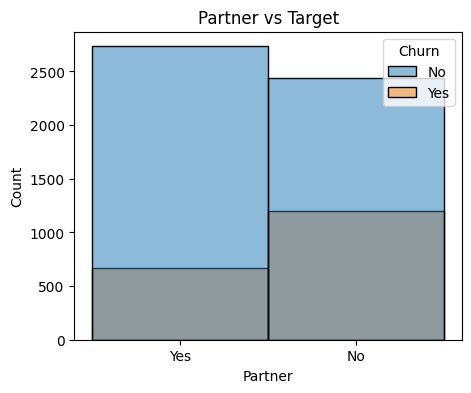

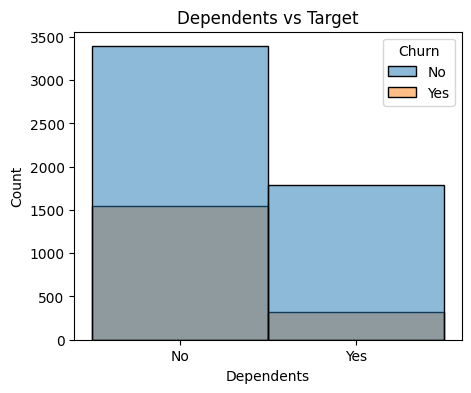

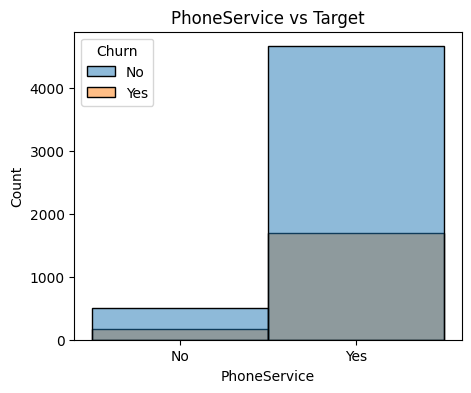

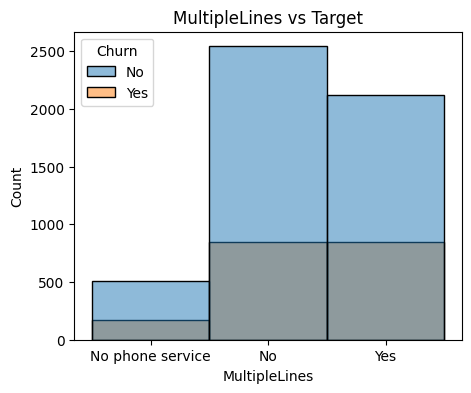

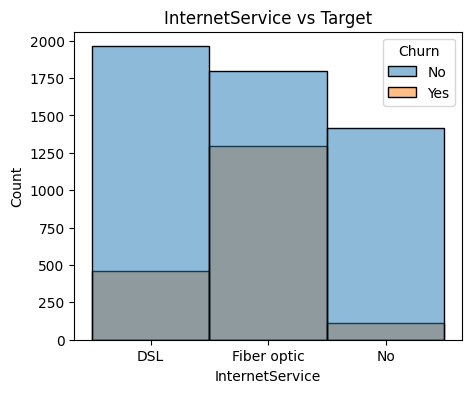

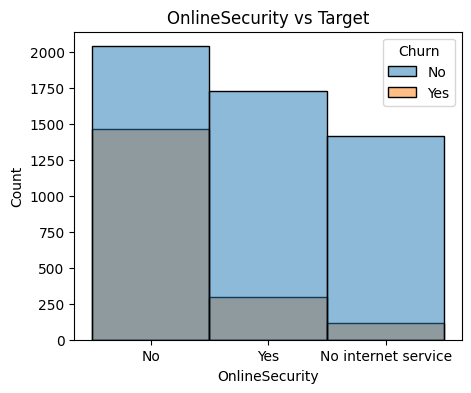

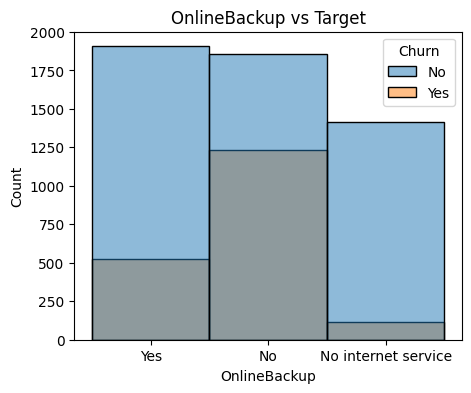

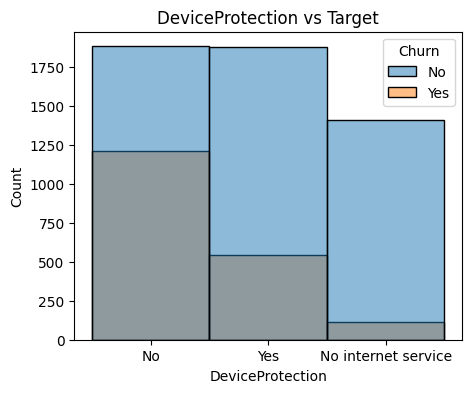

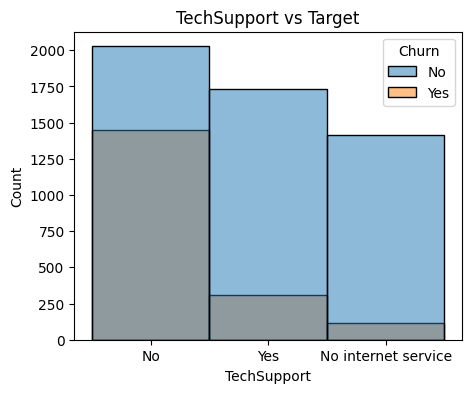

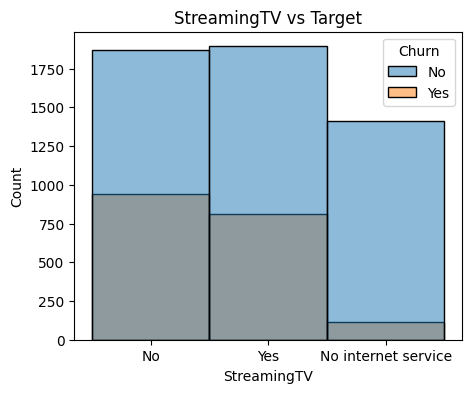

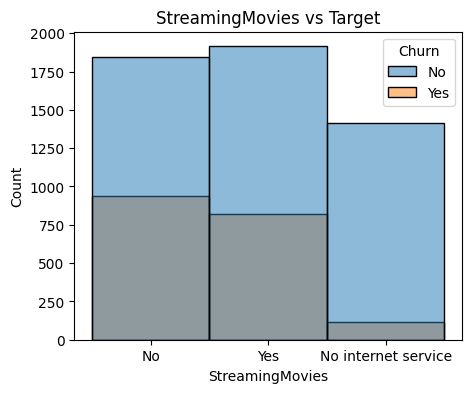

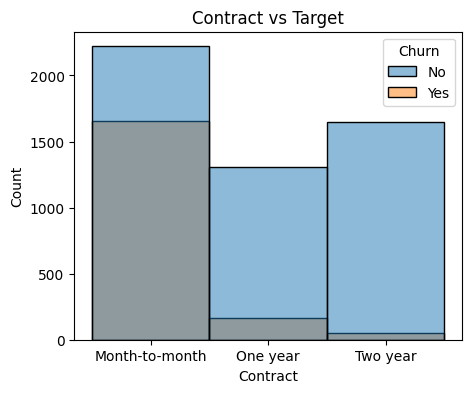

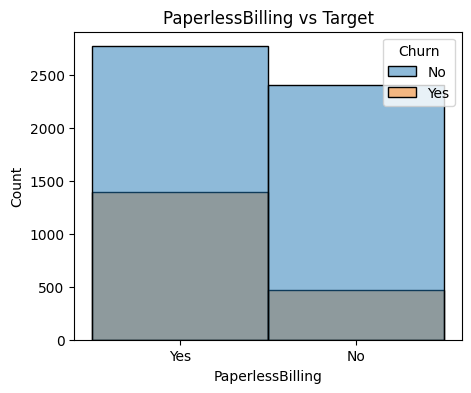

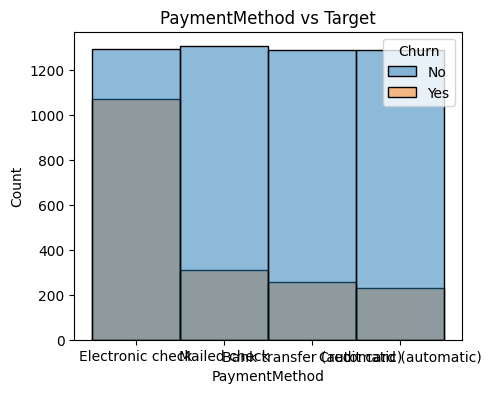

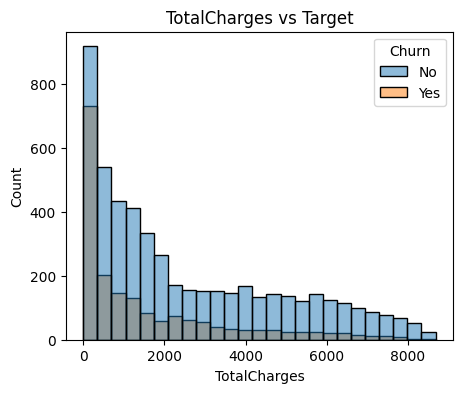

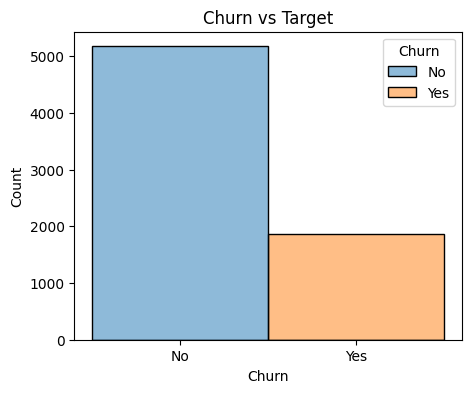

In [26]:
for col in categorical_feature:
  plt.figure(figsize=(5,4))
  sns.histplot(data=df, x=col, hue="Churn")
  plt.title(f"{col} vs Target")
  plt.show()

Data preprocessing

In [27]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


Split Target + Features

In [28]:
X = df.drop('Churn', axis=1)
y = df['Churn']


Training / Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


pipeline


identify columns

In [30]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [c for c in X.columns if c not in num_cols]


Preprocessor (Scaling + Encoding)

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [32]:
y_train.value_counts()


,count
Churn,
No,4139
Yes,1495


Create Pipeline with SMOTE


SMOTE must be applied AFTER preprocessing

But ONLY on training data, never on test set

imblearn pipeline handles this correctly

LOGISTIC REGRESSION

In [33]:
LOG_model = LogisticRegression(max_iter=1000)

LOG_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LOG_model)
])


Fit Model

In [34]:
LOG_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [35]:
# Before SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# After SMOTE
pre = LOG_pipeline.named_steps['preprocess']
sm  = LOG_pipeline.named_steps['smote']

X_train_tf = pre.transform(X_train)
X_res, y_res = sm.fit_resample(X_train_tf, y_train)

print("\nAfter SMOTE:")
print(y_res.value_counts())


Before SMOTE:
Churn
No     4139
Yes    1495
Name: count, dtype: int64

After SMOTE:
Churn
No     4139
Yes    4139
Name: count, dtype: int64


Predictions & Report

In [36]:
LOG_y_pred = LOG_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, LOG_y_pred))
print("F1 SCORE:", f1_score(y_test, LOG_y_pred, pos_label='Yes'))
print(classification_report(y_test, LOG_y_pred))

Accuracy: 0.7374024130589071
F1 SCORE: 0.6169772256728778
              precision    recall  f1-score   support

          No       0.91      0.72      0.80      1035
         Yes       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



DECISION TREE

In [37]:
DT_model = DecisionTreeClassifier()

DT_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', DT_model)
])

In [38]:
DT_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', DecisionTreeClassifier())])

In [39]:
DT_y_pred = DT_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, DT_y_pred))
print("F1 SCORE:", f1_score(y_test, DT_y_pred, pos_label='Yes'))

print(classification_report(y_test, DT_y_pred))

Accuracy: 0.7139815471965933
F1 SCORE: 0.5043050430504306
              precision    recall  f1-score   support

          No       0.83      0.77      0.80      1035
         Yes       0.47      0.55      0.50       374

    accuracy                           0.71      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.71      0.72      1409



RANDOM FOREST

In [102]:
RF_model = RandomForestClassifier()

RF_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RF_model)
])

In [103]:
RF_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier())])

In [104]:
RF_y_pred = RF_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, RF_y_pred))
print("F1 SCORE:", f1_score(y_test, RF_y_pred, pos_label='Yes'))

print(classification_report(y_test, RF_y_pred))

Accuracy: 0.7757274662881476
F1 SCORE: 0.5683060109289617
              precision    recall  f1-score   support

          No       0.84      0.86      0.85      1035
         Yes       0.58      0.56      0.57       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.77      1409



XGBoost

In [87]:
XG_model = XGBClassifier()

XG_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XG_model)
])

In [88]:
from sklearn.preprocessing import LabelEncoder

# Convert y_train to numerical labels for XGBoost
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Fit the XGBoost pipeline with the encoded training labels
XG_pipeline.fit(X_train, y_train_encoded)

# It's important to also encode y_test for proper evaluation later
y_test_encoded = le.transform(y_test)

In [89]:
XG_y_pred = XG_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test_encoded, XG_y_pred))
print("F1 SCORE:", f1_score(y_test_encoded, XG_y_pred, pos_label=1))

print(classification_report(y_test_encoded, XG_y_pred))

Accuracy: 0.7792760823278921
F1 SCORE: 0.5814266487213997
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.59      0.58      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409



SVM

In [46]:
SVC_model = SVC()

SVC_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC_model)
])

In [47]:
SVC_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)), ('model', SVC())])

In [48]:
SVC_y_pred = SVC_pipeline.predict(X_test)
SVC_y_pred_encoded = le.transform(SVC_y_pred)

print("Accuracy:", accuracy_score(y_test_encoded, SVC_y_pred_encoded))
print("F1 SCORE:", f1_score(y_test_encoded, SVC_y_pred_encoded, pos_label=1))

print(classification_report(y_test_encoded, SVC_y_pred_encoded))

Accuracy: 0.7558552164655784
F1 SCORE: 0.6099773242630385
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



NAIVE BAYES

In [49]:
from sklearn import naive_bayes
NB_model = naive_bayes.MultinomialNB()

NB_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', NB_model)
])

In [50]:
from sklearn import naive_bayes
NB_model = naive_bayes.GaussianNB()

NB_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', NB_model)
])
NB_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)), ('model', GaussianNB())])

In [51]:
NB_model_y_pred = NB_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, NB_model_y_pred))
print("F1 SCORE:", f1_score(y_test, NB_model_y_pred, pos_label='Yes'))
print(classification_report(y_test, NB_model_y_pred))

Accuracy: 0.6955287437899219
F1 SCORE: 0.588686481303931
              precision    recall  f1-score   support

          No       0.91      0.65      0.76      1035
         Yes       0.46      0.82      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.74      0.67      1409
weighted avg       0.79      0.70      0.71      1409



VISUALIZE MODELS

In [52]:
models={"LOGISTIC REGRESSION":0.73,
        "DECISION TREE":0.71,
        "RANDOM FOREST":0.77,
        "XGBoost":0.77,
        "SVM":0.75,
        "NAIVE BAYES":0.69
        }





BAR CHART

/tmp/ipython-input-2474445012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


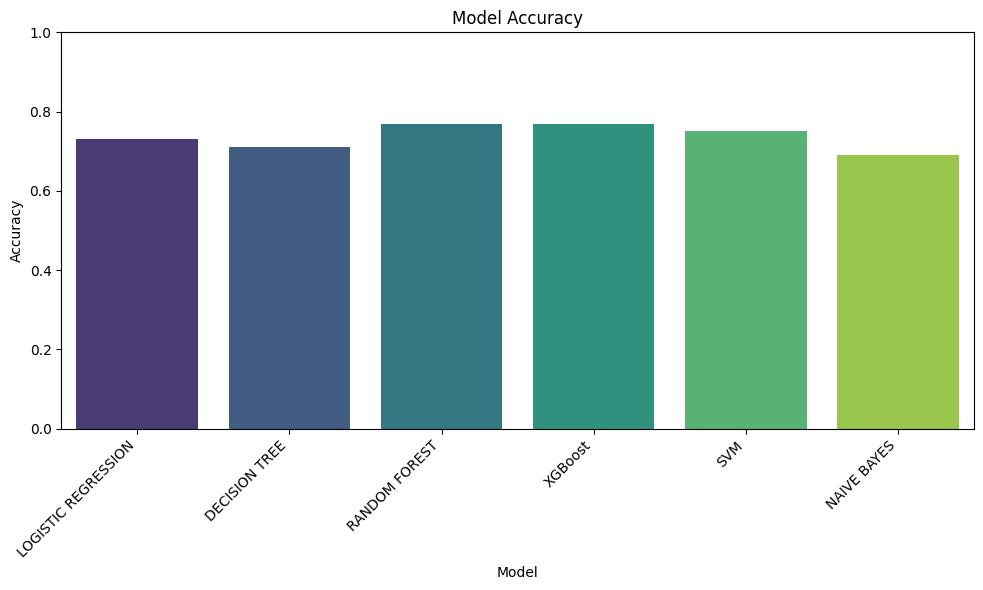

In [53]:
model_names = list(models.keys())
accuracy_scores = list(models.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.ylim(0, 1) # Set y-axis limit for accuracy
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

ROC-AUC CURVE  To get best model

In [54]:
from sklearn.metrics import roc_auc_score

y_prob = RF_pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("RANDOM FOREST ROC-AUC:", auc_score)


RANDOM FOREST ROC-AUC: 0.8197202201038517


In [55]:
y_prob = XG_pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("XGBoot ROC-AUC:", auc_score)

XGBoot ROC-AUC: 0.815681107752719


visualize ROC AUC Curve

> visual comparision between best models


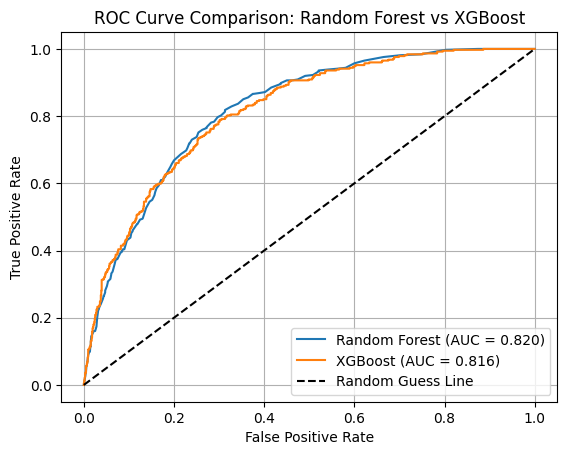

In [56]:
from sklearn.metrics import roc_curve, auc

# ---- Random Forest ----
y_prob_rf = RF_pipeline.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")

# ---- XGBoost ----
y_prob_xg = XG_pipeline.predict_proba(X_test)[:, 1]
fpr_xg, tpr_xg, _ = roc_curve(y_test_encoded, y_prob_xg)
auc_xg = auc(fpr_xg, tpr_xg)
plt.plot(fpr_xg, tpr_xg, label=f"XGBoost (AUC = {auc_xg:.3f})")

# ---- Plot settings ----

plt.plot([0, 1], [0, 1], "k--", label="Random Guess Line")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Random Forest vs XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

FEATURE IMPORTANCE RANDOM FOREST

Feature importance:
 TotalCharges                               0.112356
tenure                                     0.106986
MonthlyCharges                             0.096535
Contract_Month-to-month                    0.092968
PaymentMethod_Electronic check             0.043324
TechSupport_No                             0.040683
OnlineSecurity_No                          0.036689
Contract_Two year                          0.034024
InternetService_Fiber optic                0.029016
OnlineBackup_No                            0.021594
PaperlessBilling_No                        0.019348
Contract_One year                          0.018720
DeviceProtection_No                        0.018653
PaperlessBilling_Yes                       0.018128
OnlineSecurity_Yes                         0.017041
gender_Female                              0.016896
gender_Male                                0.016138
TechSupport_Yes                            0.014779
Partner_No                                 

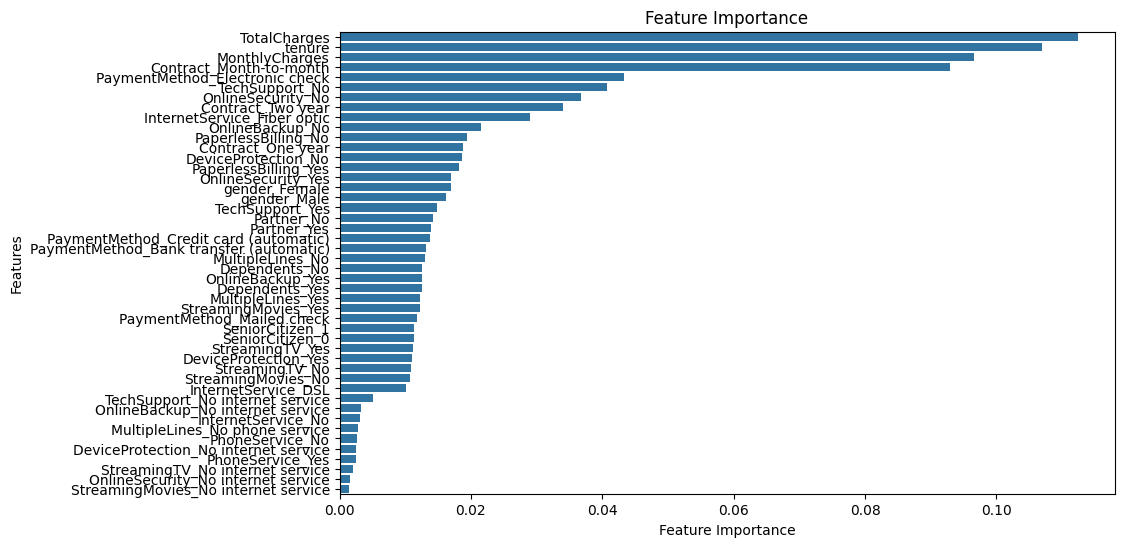

In [107]:
# extract best features from random forest
preprocessor_pipeline = RF_pipeline.named_steps['preprocess']

# Get feature names after preprocessing
num_features_out = preprocessor_pipeline.named_transformers_['num'].get_feature_names_out(num_cols)
cat_features_out = preprocessor_pipeline.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features_out = list(num_features_out) + list(cat_features_out)

feature_importances = pd.Series(RF_pipeline.named_steps['model'].feature_importances_, index=all_features_out).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
print("Feature importance:\n",feature_importances)
plt.show()

BEST MODEL

Save the Best Model (Pickle File)

In [ ]:
import joblib

joblib.dump(RF_model, "best_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")



['best_model.pkl']

 load best model


In [59]:
# loaded_model = joblib.load("best_model.pkl")
# pred = loaded_model.predict(X_test)
# print(classification_report(y_test, pred))
# print(confusion_matrix(y_test, pred))

# **summary**

| Feature                                    | Importance     | Interpretation                                                                 |
| ------------------------------------------ | -------------- | ------------------------------------------------------------------------------ |
| **TotalCharges (0.112)**                   | Highest impact | Customers with high total charges tend to churn differently; strong predictor. |
| **tenure (0.107)**                         | Very high      | Length of stay matters; new customers more likely to churn.                    |
| **MonthlyCharges (0.096)**                 | High           | High monthly bills can increase churn probability.                             |
| **Contract_Month-to-month (0.093)**        | Very important | Month-to-month contracts are more likely to churn.                             |
| **PaymentMethod_Electronic check (0.043)** | Moderate       | Certain payment methods may correlate with churn.                              |





The above top features dominate the predictions and the model relies mostly on billing + tenure + contract type.


Total charges, tenure, and monthly charges are the main drivers of churn. Customers with higher bills or shorter tenure are more likely to leave.

Contract type matters a lot. Month-to-month contracts are associated with higher churn, while longer-term contracts reduce it.

Payment method has some influence. Customers paying by electronic check show a slightly higher chance of churn.

Service-related features help but less so. Lack of tech support or online security moderately increases churn risk.

Demographics and low-impact services matter little. Gender, streaming services, or minor “no internet service” indicators do not strongly affect predictions and could be deprioritized.